# Neural Networks 

Artificial Neural Networks (ANN) became a central concept in the field of modern machine learning addressing a full range of complex problems in classification, regression, image processing, forecasting, speech recognition, NLP etc. They are inspired by the functionality of the human brain and first introduced by McCulloch and Pitts to model a biological neuron. The idea behind neural networks is that a network of neurons can be constructed by connecting multiple neurons together where the output of one neuron forms an input to another. There exist different types of architectures for neural networks. The oldest and most simple model is the multilayer perceptron as introduced by Rosenblatt. Recently, we also have the convolutional neural networks (CNN) that are particularly suited for image processing. We can also site another famous neural network architecture which is recurrent neural networks used for sequential data that we can find in time series or text. As we will see, in an artificial neural network we have an input x and an output y = f(x,θ) where the parameters θ  are estimated from a learning sample. As usual in statistical learning, we need to minimize the function which is not convex implying local minimizers. Cybenko (1989) and Hornik (1991) proposed a universal approach whereas Le Cun (1986) introduced backpropagation to compute the gradient of a neural network. 

##  Multi-layer Perceptron classifier

A multilayer perceptron or neural network is formed by connecting one neuron to every other neuron. In other to do this, neural networks are connected to each other through layers.  A neural network is composed of several hidden layers of neurons where every neuron in a layer is connected to neurons in the next layer as represented in the figure below. Specifically in multilayer perceptron, there are no links between neurons inside the same layer, but each neuron of a layer is linked to all neurons of the next layer. The output of a neuron in a hidden layer becomes the output of another neuron of the next layer. The last layer is called the output layer. Depending on the problem we are working on, classification or regression, we can apply a different activation function in the last hidden layer. For regression, no activation function is applied. In fact, we apply the identity function, but it does nothing. To run a neural network, we will need to choose a certain number of parameters such as the number of hidden layers, the number of neurons in each layer, the activation function, the activation function of the last hidden layer. In binary classification problems, each output unit implements a threshold function where the output value can be for example 0 or 1 which depends on a prediction P(Y=1/X) giving a value between 0 and 1 where we apply a threshold. For binary classification, we can use for example the sigmoid activation function since the output is a value between 0 and 1. For multiclass, we will have one neuron per class (i) in the output layer giving a sum of each prediction P(Y=i/X) equal to 1. In this case, we can use softmax function. 

### Multi-layer perceptron with scikit-learn

Inputs:

X,y: non splitted dataset separated by features (X) and labels (y). 
X_train, y_train: selected dataset to train the model separated by features (X_train) and labels (y_train)
X_test, y_test: selected dataset to test the model separated by features (X_test) and labels (y_test)
cv: number of k-folds for cross-validation 
max_iter: Maximum number of iterations (default= 200)
hidden_layer_sizes: The ith element represents the number of neurons in the ith hidden layer.
activation: Activation function for the hidden layer ('identity', 'logistic', 'relu', 'softmax', 'tanh'). default=’relu’
solver: The solver for weight optimization (‘lbfgs’, ‘sgd’, ‘adam’). default=’adam’
alpha: Strength of the L2 regularization term (default=0.0001)
learning_rate: Learning rate schedule for weight updates (‘constant’, ‘invscaling’, ‘adaptive’). default='constant'
learning_rate_init: The initial learning rate used (for sgd or adam). It controls the step-size in updating the weights.
        
Output:
        
A DataFrame with the following metrics:
accuracy_score: It is calculated as the ratio of the number of correct predictions to all number predictions made by the classifiers.
precision_score: Precision is the number of correct outputs or how many of the correctly predicted cases turned out to be positive.
recall_score: Recall defines how many of the actual positive cases we were able to predict correctly.
f1_score: It is a harmonic mean of precision and recall.
cross_val_score: Cross-validation score

In [12]:
# Importing libraries
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# load data: Capture the dataset in Python using Pandas DataFrame
csv_data = '../data/datasets/neurons.csv'
df = pd.read_csv(csv_data, delimiter=';')

# Drop row having at least 1 missing value
df = df.dropna()

# Divide the data, y the variable to predict (Target) and X the features
X = df[df.columns[1:]]
y = df['Target']

# Splitting the data : training and test (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
Normalize = preprocessing.StandardScaler()
# Transform data
X_train = Normalize.fit_transform(X_train)
X_test = Normalize.fit_transform(X_test)

cv=5
max_iter = 400
hidden_layer_sizes = 10
activation = 'relu'
solver = 'sgd'
alpha = 0.0001
learning_rate = 'constant'
learning_rate_init = 0.0001

model = MLPClassifier(max_iter = 400, hidden_layer_sizes = hidden_layer_sizes, activation = activation, solver = solver, alpha = alpha, learning_rate = learning_rate, learning_rate_init = learning_rate_init)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
    
results = [metrics.accuracy_score(y_test, y_pred),metrics.precision_score(y_test, y_pred, average='micro'),metrics.recall_score(y_test, y_pred, average='micro'),metrics.f1_score(y_test, y_pred, average='micro'), cross_val_score(model, X_train, y_train, cv=cv).mean(), cross_val_score(model, X_train, y_train, cv=cv).std()]
metrics_dataframe = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1 Score", "Cross-validation mean", "Cross-validation std"], columns={'MLP_neural_network'})

print('Classification Report for MLP Neural Network:\n')
print(classification_report(y_test,y_pred))

metrics_dataframe

/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LRENC/Lib

Classification Report for MLP Neural Network:

                precision    recall  f1-score   support

    astrocytes       0.80      0.52      0.63       322
        basket       0.57      0.36      0.44        91
      bitufted       0.00      0.00      0.00        13
    chandelier       0.00      0.00      0.00         5
double_bouquet       0.00      0.00      0.00        13
      ganglion       0.00      0.00      0.00        72
       granule       0.67      0.05      0.10       187
    martinotti       0.00      0.00      0.00        30
  medium_spiny       0.00      0.00      0.00       176
     microglia       0.67      0.97      0.79      1247
     nitrergic       0.61      0.67      0.64       400
parachromaffin       0.92      0.68      0.78       114
      purkinje       0.00      0.00      0.00        97
     pyramidal       0.86      0.91      0.88      2809

      accuracy                           0.77      5576
     macro avg       0.36      0.30      0.31      5576

,MLP_neural_network
Accuracy,0.773852
Precision,0.773852
Recall,0.773852
F1 Score,0.773852
Cross-validation mean,0.799821
Cross-validation std,0.007810


### Multi-layer perceptron with scikit-learn: Automatically find the best hyperparameters

In [24]:
# Importing libraries
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# load data: Capture the dataset in Python using Pandas DataFrame
csv_data = '../data/datasets/neurons_binary.csv'
neuron = pd.read_csv(csv_data, delimiter=';')

df = neuron.head(22).copy()
df = pd.concat([df, neuron.iloc[17033:17053]])

# Drop row having at least 1 missing value
df = df.dropna()

# Divide the data, y the variable to predict (Target) and X the features
X = df[df.columns[1:]]
y = df['Target']

# Splitting the data : training and test (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
Normalize = preprocessing.StandardScaler()
# Transform data
X_train = Normalize.fit_transform(X_train)
X_test = Normalize.fit_transform(X_test)

# Instantiate the estimator
mlp_gs = MLPClassifier()
parameter_space = {
        'hidden_layer_sizes': [(10,30,10),(20,)],
        'activation': ['identity', 'logistic', 'tanh', 'relu'],
        'solver': ['sgd', 'adam', 'lbfgs'],
        'alpha': [0.0001, 0.05],
        'learning_rate': ['constant','adaptive','invscaling'],
}
# Hyperparameters search
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
# Fit the estimator to the data
model.fit(X_train, y_train) # X is train samples and y is the corresponding labels
# Use the model to predict the last several labels
y_pred = model.predict(X_test)
    
results = [metrics.accuracy_score(y_test, y_pred),metrics.precision_score(y_test, y_pred, average='micro'),metrics.recall_score(y_test, y_pred, average='micro'),metrics.f1_score(y_test, y_pred, average='micro'), cross_val_score(model, X_train, y_train, cv=cv).mean(), cross_val_score(model, X_train, y_train, cv=cv).std()]
metrics_dataframe = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1 Score", "Cross-validation mean", "Cross-validation std"], columns={'mlp_neural_network_auto'})

print('Classification Report for MLP Neural Network Auto:\n')
print(classification_report(y_test,y_pred))

metrics_dataframe


/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LRENC/Lib

/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LRENC/Lib

/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LRENC/Lib

/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LRENC/Lib

/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LRENC/Lib

/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LRENC/Lib

/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LRENC/Lib

/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification Report for MLP Neural Network Auto:

              precision    recall  f1-score   support

interneurons       1.00      0.80      0.89         5
   principal       0.80      1.00      0.89         4

    accuracy                           0.89         9
   macro avg       0.90      0.90      0.89         9
weighted avg       0.91      0.89      0.89         9



/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,mlp_neural_network_auto
Accuracy,0.888889
Precision,0.888889
Recall,0.888889
F1 Score,0.888889
Cross-validation mean,0.880952
Cross-validation std,0.108588


/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LRENC/Lib

/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LRENC/Lib

/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LRENC/Lib

/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LRENC/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LRENC/Lib

### Multi-layer perceptron neural network using keras on tensorflow for GPU

In [58]:
# Importing libraries
import pandas as pd
import numpy as np
import tensorflow as tf

from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# load data: Capture the dataset in Python using Pandas DataFrame
csv_data = '../data/datasets/neurons_binary.csv'
neuron = pd.read_csv(csv_data, delimiter=';')
# Creating an instance of Labelencoder
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
# Assigning numerical value and storing it
neuron[['Target']] = neuron[['Target']].apply(enc.fit_transform)

# Select a subset of the data
df = neuron.head(300).copy()
df = pd.concat([df, neuron.iloc[17033:17333]])

# Drop row having at least 1 missing value
df = df.dropna()

# Divide the data, y the variable to predict (Target) and X the features
X = df[df.columns[1:]]
y = df['Target']

# Splitting the data : training and test (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
Normalize = preprocessing.StandardScaler()
# Transform data
X_train = Normalize.fit_transform(X_train)
X_test = Normalize.fit_transform(X_test)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report
from tensorflow.keras.losses import binary_crossentropy
    
# Print number of GPUs available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
# For future use, which devices the operations and tensors are assigned to (GPU, CPU)
#tf.debugging.set_log_device_placement(True)

# Parameters and Hyperparameters of the model
gpu_mlp_activation = 'sigmoid'
gpu_mlp_optimizer= SGD(learning_rate = 1e-2)
gpu_mlp_epochs = 10
gpu_mlp_loss = 'binary_crossentropy'


# Define number of classes and number of features to include in our model
number_of_classes = df.groupby('Target').count().shape[0]
number_of_features = X_train.shape[1]

# Model
keras_model = Sequential()
keras_model.add(Dense(number_of_classes, activation=gpu_mlp_activation))
keras_model.add(Flatten(input_dim=number_of_features))
keras_model.compile(optimizer = gpu_mlp_optimizer,
                    loss = 'binary_crossentropy',
                    metrics = [gpu_mlp_loss])
keras_model.fit(X_train, y_train, epochs=gpu_mlp_epochs)
keras_model.evaluate(X_test, y_test) # loss, sparse_categorical_accuracy

# Predicting X_test data with the created model
y_keras_pred = keras_model.predict(X_test)
y_keras_test = np.argmax(y_keras_pred,axis=1) #Make labels back
    
    
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
        
print("Classfication report for multi-layer perceptron using GPUs (if available)\n")
print(classification_report(y_test, y_keras_test))
print("\n")
                            
# Compute and print predicted output with X_test as new input data
print('Print predicted output with X_test as new input data \n')
print('\n')
print('Predictions: \n', y_keras_test)
print('\n')
print('Real values: \n', y_test)
print('\n')

results = [accuracy_score(y_test, y_keras_test), precision_score(y_test, y_keras_test,average='micro'), recall_score(y_test, y_keras_test,average='micro'), f1_score(y_test, y_keras_test,average='micro')]
metrics_dataframe = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1 Score"], columns={'gpu_mlp'})
    
metrics_dataframe

Num GPUs Available:  0
Epoch 1/10
15/15 [==============================] - 0s 791us/step - loss: 0.6210 - binary_crossentropy: 0.6210
Epoch 2/10
15/15 [==============================] - 0s 799us/step - loss: 0.5625 - binary_crossentropy: 0.5625
Epoch 3/10
15/15 [==============================] - 0s 776us/step - loss: 0.5201 - binary_crossentropy: 0.5201
Epoch 4/10
15/15 [==============================] - 0s 749us/step - loss: 0.4876 - binary_crossentropy: 0.4876
Epoch 5/10
15/15 [==============================] - 0s 753us/step - loss: 0.4619 - binary_crossentropy: 0.4619
Epoch 6/10
15/15 [==============================] - 0s 783us/step - loss: 0.4405 - binary_crossentropy: 0.4405
Epoch 7/10
15/15 [==============================] - 0s 764us/step - loss: 0.4224 - binary_crossentropy: 0.4224
Epoch 8/10
15/15 [==============================] - 0s 775us/step - loss: 0.4067 - binary_crossentropy: 0.4067
Epoch 9/10
15/15 [==============================] - 0s 741us/step - loss: 0.3929 - binary

,gpu_mlp
Accuracy,0.758333
Precision,0.758333
Recall,0.758333
F1 Score,0.758333


## Recurrent Neural Network with Keras on TensorFlow

Recurrent Neural Network using GPUs if available. Recurrent neural network (RNN) is well suited for sequential data such as text or time series. RNN is not so different than traditional neural network, but we can see it as multiple copies of the same network, each passing information to its successor. 
RNNs are widely used for speech recognition where we are given an input audio clip, sentiment classification to predict the number of stars a service will be given according to the feedback provided, DNA sequence analysis, machine translation, etc

Inputs:
- rnn_units: Positive integer, dimensionality of the output space.
- rnn_activation:  Activation function to use (softmax, sigmoid, linear or tanh)
- rnn_optimizer: Optimizer (adam, sgd, RMSprop)
- rnn_loss: Loss function such as the mean squared error ('mse'), the binary logarithmic loss ('binary_crossentropy') or the multi-class logarithmic loss ('categorical_crossentropy').
        rnn_epochs: Number (Integer) of epochs

Output: 
A DataFrame with the following metrics:
- Root mean squared error (MSE)
- R2 score


In [34]:
# Importing libraries
import pandas as pd
import numpy as np
import tensorflow as tf

from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, mean_squared_error, r2_score

import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD

# Load data
DailyDelhiClimateTrain = '../data/datasets/DailyDelhiClimateTrain.csv'
df = pd.read_csv(DailyDelhiClimateTrain, delimiter=',')

# define time format
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')

# create a DataFrame with new columns (year, month and day)
df['year']=df['date'].dt.year 
df['month']=df['date'].dt.month 
df['day']=df['date'].dt.day

# Delete column 'date'
df.drop('date', inplace=True, axis=1)

# Rename colunm meantemp to Target
df = df.rename(columns={"meantemp": "Target"})

# Drop row having at least 1 missing value
df = df.dropna()

# Divide the data, y the variable to predict (Target) and X the features
X = df[df.columns[1:]]
y = df['Target']

# Splitting the data : training and test (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
Normalize = preprocessing.StandardScaler()
# Transform data
X_train = Normalize.fit_transform(X_train)
X_test = Normalize.fit_transform(X_test)

# Parameters and Hyperparameters of the model
rnn_units = 500 # Positive integer, dimensionality of the output space.
rnn_activation = 'tanh' # Activation function to use. 
rnn_features = X_train.shape[1] # Number of features
rnn_optimizer= 'RMSprop' # Optimizer 
rnn_loss = 'mse' # Loss function
rnn_epochs = 50 # Number of epochs

# The LSTM architecture
model_lstm = Sequential()
model_lstm.add(LSTM(units=rnn_units, activation=rnn_activation, input_shape = (rnn_features, 1)))
model_lstm.add(Dense(units=1))
# Compiling the model
model_lstm.compile(optimizer=rnn_optimizer, loss=rnn_loss)
model_lstm.fit(X_train, y_train, epochs=rnn_epochs)

    
# Model prediction
y_pred = model_lstm.predict(X_train)

# Extracting the weights and biases is achieved quite easily
model_lstm.layers[0].get_weights()

# We can save the weights and biases in separate variables
weights = model_lstm.layers[0].get_weights()[0]
bias = model_lstm.layers[0].get_weights()[1]

mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

# Compute and print predicted output with X_test as new input data
print("\n")
print('Print predicted output with X_test as new input data \n')
print('\n')
print('Predictions: \n', model_lstm.predict(X_test))
print('\n')
print('Real values: \n', y_test)
print('\n')

# Printing metrics
print("RNN on GPU \n")
print('Root mean squared error: ', mse)
print('R2 score: ', r2)
print("Intercept:", bias)
print("Weights:",weights)
print('\n')

results = [mse, r2]
metrics_dataframe = pd.DataFrame(results, index=["MSE", "R-squared"], columns={'rnn'})
    
metrics_dataframe

Epoch 1/50
37/37 [==============================] - 3s 27ms/step - loss: 133.7000
Epoch 2/50
37/37 [==============================] - 1s 30ms/step - loss: 46.5097
Epoch 3/50
37/37 [==============================] - 1s 30ms/step - loss: 45.7743
Epoch 4/50
37/37 [==============================] - 1s 30ms/step - loss: 46.2194
Epoch 5/50
37/37 [==============================] - 1s 33ms/step - loss: 44.2782
Epoch 6/50
37/37 [==============================] - 1s 35ms/step - loss: 41.6853
Epoch 7/50
37/37 [==============================] - 1s 34ms/step - loss: 43.0797
Epoch 8/50
37/37 [==============================] - 1s 34ms/step - loss: 40.2040
Epoch 9/50
37/37 [==============================] - 1s 36ms/step - loss: 40.9942
Epoch 10/50
37/37 [==============================] - 1s 36ms/step - loss: 39.3479
Epoch 11/50
37/37 [==============================] - 1s 37ms/step - loss: 38.8764
Epoch 12/50
37/37 [==============================] - 2s 41ms/step - loss: 37.3800
Epoch 13/50
37/37 [=====

,rnn
MSE,3.426274
R-squared,0.936434


## Building a Convolutional Neural Networks

Multilayer perceptron’s are not suitable for some types of data such as images because the process obliges us to transform the images into vectors and therefore, we lose information such as spatial information. The convolutional neural networks introduced by the French scientist Yan LeCun allows to avoid the manual features extraction procedure, let us work directly on matrices or tensors with three RGB color channels, and are now widely used for image processing (classification segmentation, recognition, etc.). 

A digital image can be considered as matrices of numbers where each number correspond to the brightness of a pixel. In the RGB model, we have three matrices (Red, Green, Blue) storing values from 0 to 255. In images that are black-and-white, a single matrix is needed. 

CNNs are composed of several layers: convolutional layers, pooling layers and fully connected layers. Let’s start to understand convolution layers. Mathematically, convolution is an operation where two functions (f and g) produce a third function f*g that express the modification of the shape of one by the other. 

ValueError: cannot reshape array of size 47040000 into shape (60000,28,28,3)

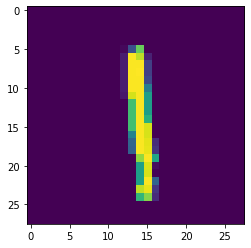

In [22]:
import tensorflow as tf
from keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

# Download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Display one image 
plt.imshow(X_train[8])

# Check image shape
X_train[8].shape

# Here we reshape the data to fit model with 60000 images for training, image size is 28x28
# 1 means that the image is greyscale.
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

# One-hot encode target column
# A column will be created for each output category. 
# For example, for an image with the number 2 we will have [0,1,0,0,0,0,0,0,0,0]
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[8])

# Creation of the model using Sequential() to build a model layer by layer
model = Sequential()

# Adding model layers
# The first two layers are convolutional layers (Conv2D) dealing with 2D matrices
# We set the first layer with 60 nodes and the second layer with 30 nodes. We can adjust these numbers.
# We choose relu as activation function for our first two layers, softmax for the last one. 
# We set the kernel_size parameter to 3 which means that the size of the filter matrix for the convolution is 3x3.
# The input_shape is simply the size of our images and 1 means that the image is greyscale
model.add(Conv2D(60, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(30, kernel_size=3, activation='relu'))
# Here we add a Flatten layer between the Convolutional layers and the Dense layer in order to connect both of them. 
model.add(Flatten())
# The Dense layer is our output layer (standard) with the softmax activation function in order to make the output sum up to 1.
# It means that we will have "probabilities" to predict our images
model.add(Dense(10, activation='softmax'))

# Compile model 
# We use the adam optimizer and the categorical cross-entropy loss function. 
# We use accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

# Let's predict the first 5 images in the test set
predictions = model.predict(X_test[:5])
print("\n")
print("Predicted values: ")
print(predictions)
print("\n")

# Actual results for first 5 images in test set
print("Actual values:")
print(y_test[:5])

In [29]:
# Check image shape
X_train.shape[0]/2000

30.0

In [30]:
X_test.shape[0]/1000

10.0